<a href="https://colab.research.google.com/github/aru-nima09/face-recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

orl_faces.zip  sample_data


In [2]:
!unzip orl_faces.zip

Archive:  orl_faces.zip
  inflating: README                  
  inflating: s1/1.pgm                
  inflating: s1/10.pgm               
  inflating: s1/2.pgm                
  inflating: s1/3.pgm                
  inflating: s1/4.pgm                
  inflating: s1/5.pgm                
  inflating: s1/6.pgm                
  inflating: s1/7.pgm                
  inflating: s1/8.pgm                
  inflating: s1/9.pgm                
  inflating: s10/1.pgm               
  inflating: s10/10.pgm              
  inflating: s10/2.pgm               
  inflating: s10/3.pgm               
  inflating: s10/4.pgm               
  inflating: s10/5.pgm               
  inflating: s10/6.pgm               
  inflating: s10/7.pgm               
  inflating: s10/8.pgm               
  inflating: s10/9.pgm               
  inflating: s11/1.pgm               
  inflating: s11/10.pgm              
  inflating: s11/2.pgm               
  inflating: s11/3.pgm               
  inflating: s11/4.pgm    

In [3]:
!ls

orl_faces.zip  s11  s15  s19  s22  s26	s3   s33  s37  s40  s8
README	       s12  s16  s2   s23  s27	s30  s34  s38  s5   s9
s1	       s13  s17  s20  s24  s28	s31  s35  s39  s6   sample_data
s10	       s14  s18  s21  s25  s29	s32  s36  s4   s7


In [4]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd
import re # Import the regular expression module

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = []
labels = []

path = "."

for person in os.listdir(path):
    # Filter to process only directories named 'sX' or 'sXX' (e.g., s1, s10, s40)
    if not re.match(r'^s\d+$', person):
        continue
    person_path = os.path.join(path, person)

    # Ensure it's actually a directory
    if not os.path.isdir(person_path):
        continue

    for image_name in os.listdir(person_path):
        img_path = os.path.join(person_path, image_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was loaded successfully
        if img is None:
            # Optionally, you can print a warning here if you want to know which files failed to load
            # print(f"Warning: Could not read image {img_path}. Skipping.")
            continue # Skip to the next file if image loading failed

        img = cv2.resize(img, (92,112))
        data.append(img.flatten())
        labels.append(person)

data = np.array(data)
labels = np.array(labels)

print("Dataset Shape:", data.shape)

Dataset Shape: (400, 10304)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=42
)

In [8]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Reduced Dimension:", X_train_pca.shape)

Reduced Dimension: (280, 100)


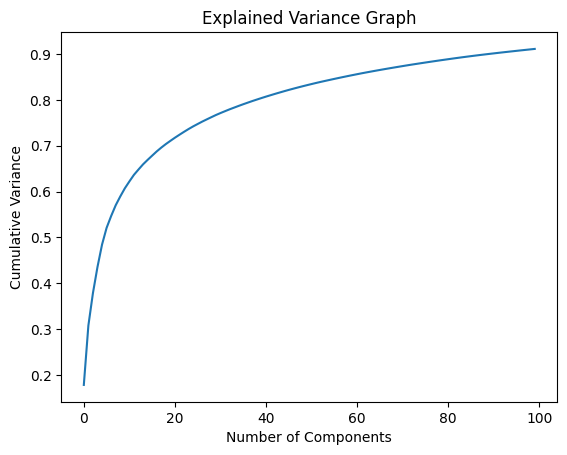

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.title("Explained Variance Graph")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 89.16666666666667


In [12]:
def run_experiment(n_components):
    pca = PCA(n_components=n_components)

    start = time.time()
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    pca_time = time.time() - start

    knn = KNeighborsClassifier(n_neighbors=3)
    start = time.time()
    knn.fit(X_train_pca, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = knn.predict(X_test_pca)
    test_time = time.time() - start

    acc = accuracy_score(y_test, y_pred)

    return acc*100, train_time, test_time

In [13]:
results = []

for comp in [50, 100, 150]:
    acc, train_t, test_t = run_experiment(comp)
    results.append([comp, acc, train_t, test_t])

In [14]:
df = pd.DataFrame(results, columns=[
    "PCA Components", "Accuracy (%)",
    "Training Time (s)", "Testing Time (s)"
])

df

,PCA Components,Accuracy (%),Training Time (s),Testing Time (s)
0,50,90.000000,0.001267,0.001859
1,100,90.000000,0.003358,0.004030
2,150,88.333333,0.001359,0.008182
